<a href="https://colab.research.google.com/github/mohitx84/Kaggle-Competition-2/blob/main/Academic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Input, Dense, Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint ,CSVLogger,EarlyStopping,ReduceLROnPlateau,LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, F1Score, AUC

In [ ]:
Reading train Dataset

In [2]:
df=pd.read_csv("train.csv.zip")
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
df.drop(columns=["id"],inplace=True)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
x=df.drop(columns=['Target'])
y=df['Target']

In [7]:
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32


In [8]:
encoderr=OneHotEncoder(sparse_output=False)
y=encoderr.fit_transform(y.values.reshape(-1,1))

In [9]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [10]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [11]:
x_train,x_dammy,y_train,y_dammy =train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [12]:
x_valid,x_test,y_valid,y_test=train_test_split(x_dammy,y_dammy,test_size=0.5,random_state=42,stratify=y_dammy)

In [13]:
model=Sequential([ Dense(512,activation='relu',input_dim=(x_train.shape[1])),
    Dropout(0.1),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(3,activation="softmax")
])
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', Precision()]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,555 (717.01 KB)

 Trainable params: 183,555 (717.01 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
x_train.shape[1]

36

In [15]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
dr=Dropout(0.1)(d1)
d2=Dense(256,activation='relu')(dr)
d3=Dense(128,activation='relu')(d2)
out=Dense(3,activation="softmax")(d3)
model=Model([inp],[out])

In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,555 (717.01 KB)

 Trainable params: 183,555 (717.01 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [18]:
modelcheckpoints=ModelCheckpoint('model.weights.keras',monitor='val_loss',save_best_only=True,save_weights_only=False)
earlyStopping=EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)
logger=CSVLogger('model.csv')

In [19]:
hist=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=20,batch_size=32,callbacks=[modelcheckpoints,earlyStopping,logger])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_6']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7940 - loss: 0.5555 - precision_1: 0.8311

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_6']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7940 - loss: 0.5555 - precision_1: 0.8311 - val_accuracy: 0.8070 - val_loss: 0.5001 - val_precision_1: 0.8392
Epoch 2/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8101 - loss: 0.4970 - precision_1: 0.8354 - val_accuracy: 0.8019 - val_loss: 0.5160 - val_precision_1: 0.8253
Epoch 3/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8132 - loss: 0.4926 - precision_1: 0.8334 - val_accuracy: 0.8133 - val_loss: 0.4938 - val_precision_1: 0.8301
Epoch 4/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8132 - loss: 0.4889 - precision_1: 0.8325 - val_accuracy: 0.8133 - val_loss: 0.4863 - val_precision_1: 0.8207
Epoch 5/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8137 - loss: 0.4917 - precision_1: 0.8336 - val_accuracy: 0.8080 - val_loss: 0.5018 - val_precision_1: 0.8393
Epoch 6/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8150 - loss: 0.4967 - precision_1: 0.8397 - val_ac

In [20]:
hist.history['accuracy']

[0.8019570708274841,
 0.8112359642982483,
 0.814421534538269,
 0.813637375831604,
 0.8126735687255859,
 0.8143725395202637,
 0.8138988018035889,
 0.8141438364982605,
 0.8122814893722534,
 0.8109582662582397,
 0.8114810585975647,
 0.811856746673584,
 0.8126899003982544]

In [21]:
hist.history['val_accuracy']

[0.8069785833358765,
 0.8018818497657776,
 0.8132514357566833,
 0.8132514357566833,
 0.8080240488052368,
 0.8129900693893433,
 0.8163878917694092,
 0.813904881477356,
 0.812205970287323,
 0.7911657094955444,
 0.8051489591598511,
 0.8041034936904907,
 0.8080240488052368]

<function matplotlib.pyplot.show(close=None, block=None)>

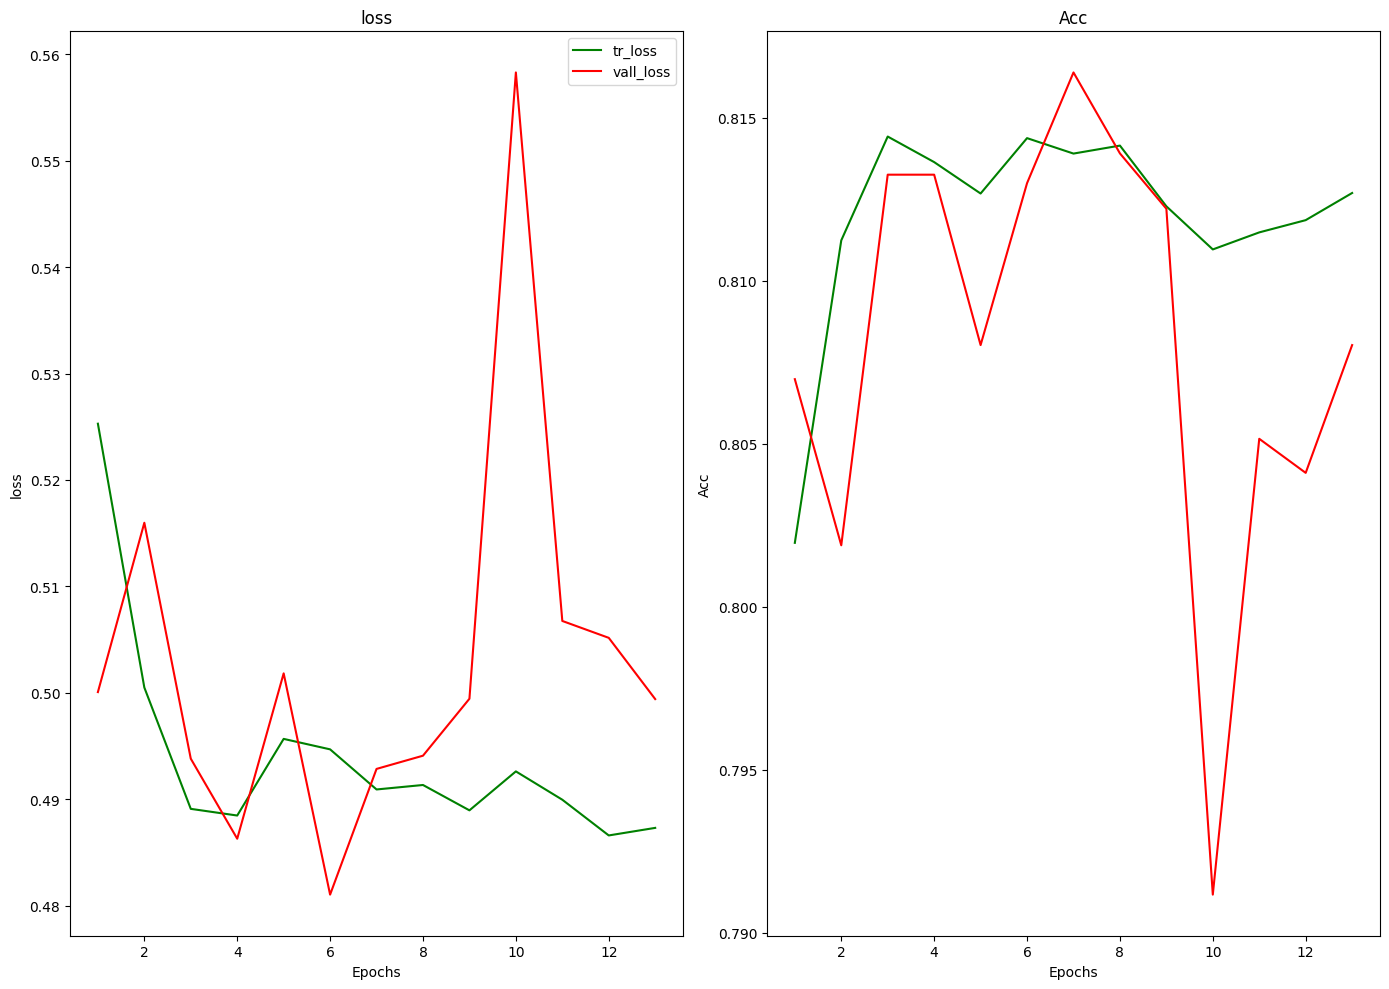

In [24]:
tr_loss=hist.history['loss']
vall_loss=hist.history['val_loss']
tr_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show

In [26]:
model.save('model2.h5')

In [29]:
from tensorflow.keras.models import load_model
model2=load_model('model.weights.keras')

In [30]:
model2.evaluate(x_valid,y_valid)

240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8052 - loss: 0.4867 - precision_1: 0.8280


[0.4810279309749603, 0.8129900693893433, 0.8343088030815125]

In [31]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
dr=Dropout(0.1)(d1)
d2=Dense(256,activation='relu')(dr)
dr1=Dropout(0.1)(d2)
d3=Dense(128,activation='relu')(dr1)
out=Dense(3,activation="softmax")(d3)
model2=Model([inp],[out])
model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,555 (717.01 KB)

 Trainable params: 183,555 (717.01 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [33]:
hist2=model2.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=20,batch_size=32,callbacks=[modelcheckpoints,earlyStopping,logger])


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.5132 - precision_2: 0.8317

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8014 - loss: 0.5132 - precision_2: 0.8317 - val_accuracy: 0.8121 - val_loss: 0.4798 - val_precision_2: 0.8303
Epoch 2/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8189 - loss: 0.4697 - precision_2: 0.8390 - val_accuracy: 0.8118 - val_loss: 0.4805 - val_precision_2: 0.8256
Epoch 3/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8202 - loss: 0.4670 - precision_2: 0.8399 - val_accuracy: 0.8177 - val_loss: 0.4729 - val_precision_2: 0.8370
Epoch 4/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8238 - loss: 0.4586 - precision_2: 0.8435 - val_accuracy: 0.8193 - val_loss: 0.4661 - val_precision_2: 0.8430
Epoch 5/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8236 - loss: 0.4556 - precision_2: 0.8440 - val_accuracy: 0.8203 - val_loss: 0.4641 - val_precision_2: 0.8444
Epoch 6/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8271 - loss: 0.4523 - precision_2: 0.8460 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

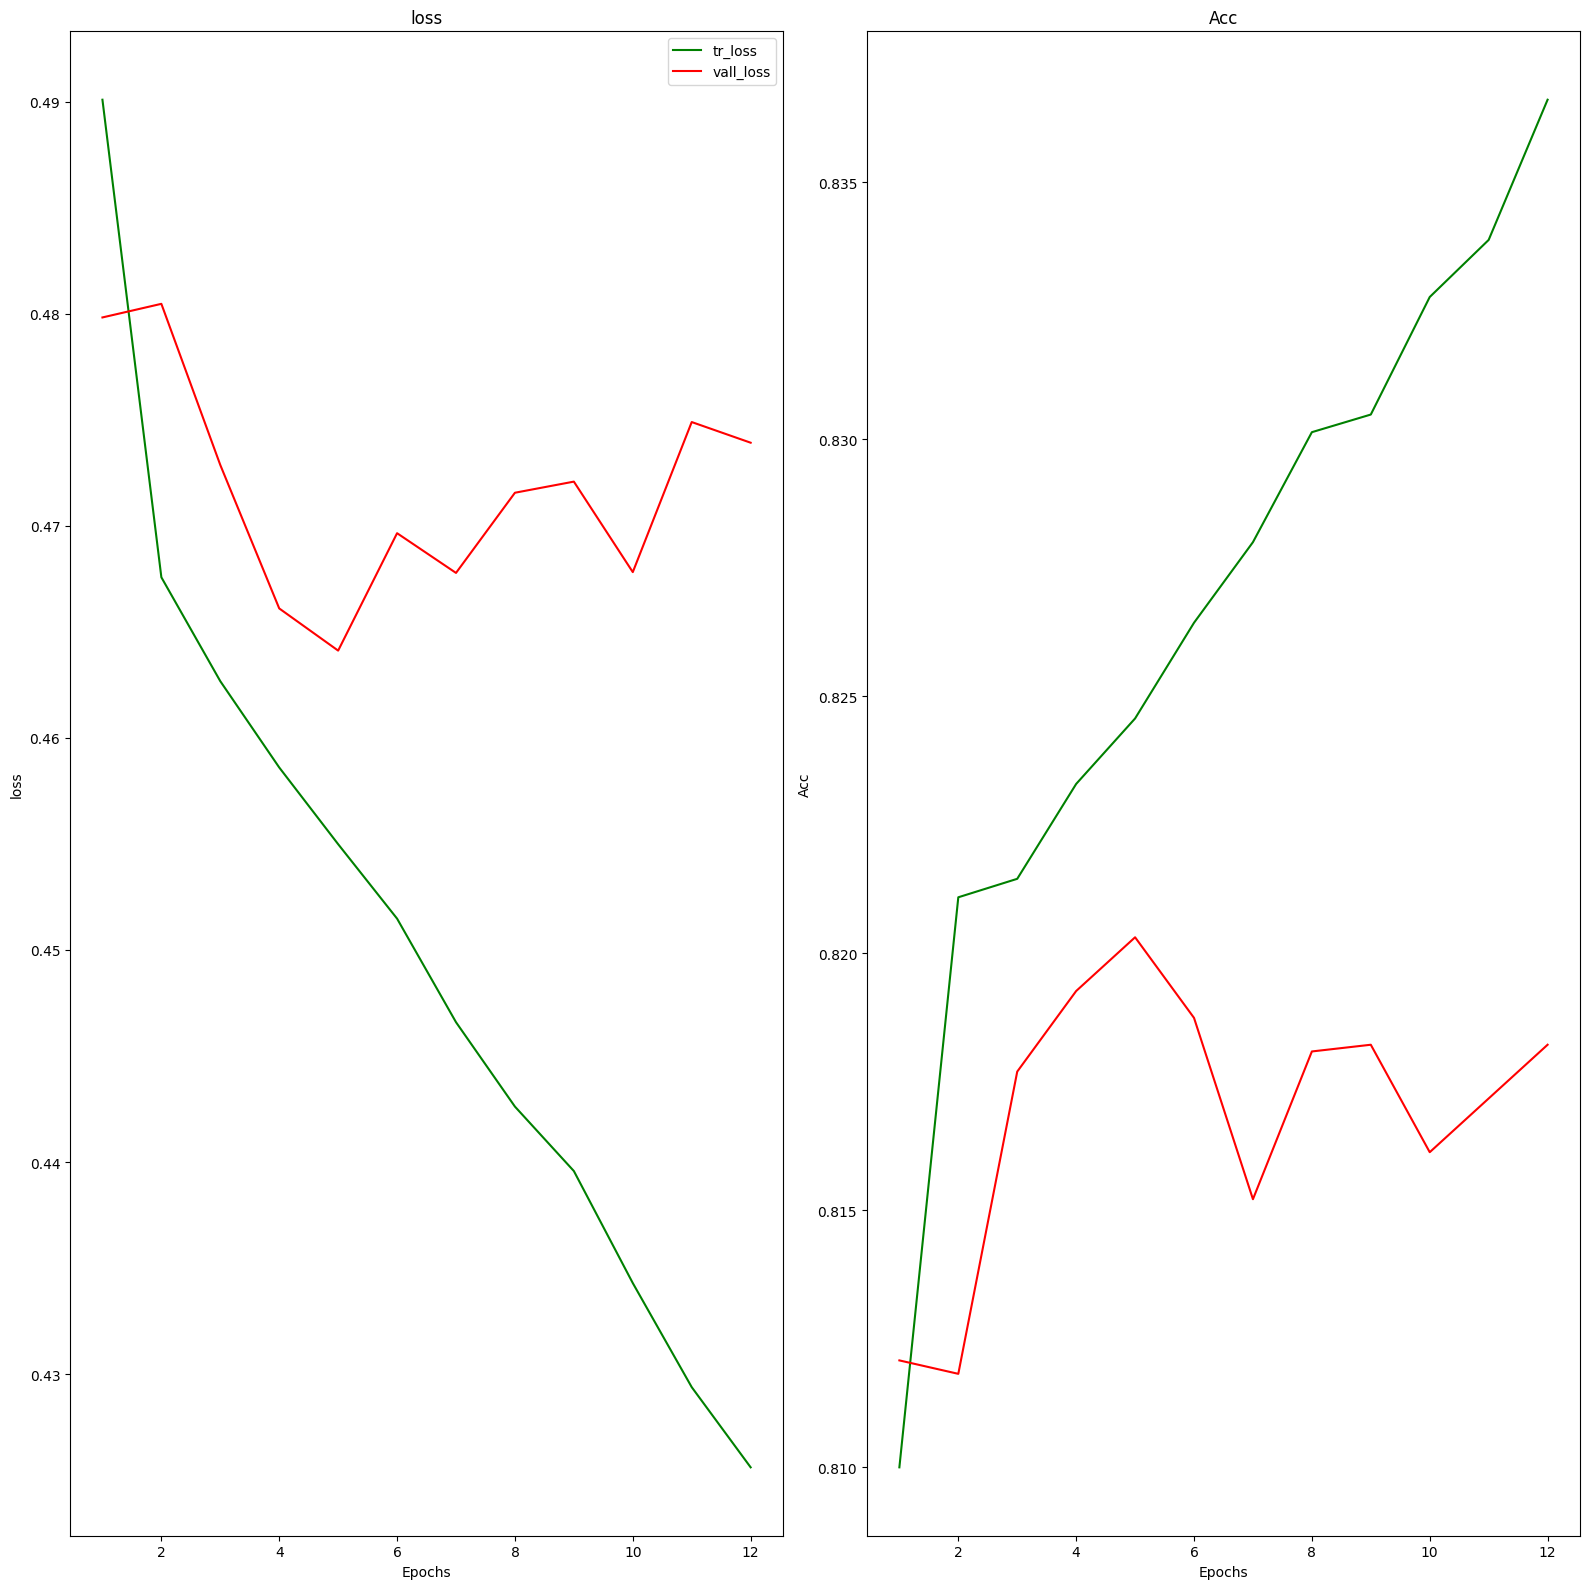

In [34]:
tr_loss=hist2.history['loss']
vall_loss=hist2.history['val_loss']
tr_acc=hist2.history['accuracy']
val_acc=hist2.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show

In [35]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
BatchNormalization(),
dr=Dropout(0.2)(d1)
d2=Dense(512,activation='relu')(dr)
dr1=Dropout(0.2)(d2)
d6=Dense(512,activation='relu')(dr1)
dr2=Dropout(0.1)(d6)
d3=Dense(256,activation='relu')(dr2)
d4=Dense(128,activation='relu')(d3)
d5=Dense(64,activation='relu')(d4)
out=Dense(3,activation="softmax")(d5)
model3=Model([inp],[out])
model3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,931 (2.73 MB)

 Trainable params: 716,931 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model3.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [37]:
modelcheckpoints=ModelCheckpoint('model.weights.keras',monitor='val_loss',save_best_only=True,save_weights_only=False)
earlyStopping=EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=True)
logger=CSVLogger('model.csv')

In [38]:
hist3=model3.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=50,batch_size=64,callbacks=[modelcheckpoints,earlyStopping,logger])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_29']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


957/957 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7692 - loss: 0.6055 - precision_3: 0.8185

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_29']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7692 - loss: 0.6055 - precision_3: 0.8185 - val_accuracy: 0.8082 - val_loss: 0.4804 - val_precision_3: 0.8262
Epoch 2/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8114 - loss: 0.4865 - precision_3: 0.8317 - val_accuracy: 0.8119 - val_loss: 0.4802 - val_precision_3: 0.8306
Epoch 3/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8167 - loss: 0.4734 - precision_3: 0.8360 - val_accuracy: 0.8174 - val_loss: 0.4664 - val_precision_3: 0.8344
Epoch 4/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8197 - loss: 0.4674 - precision_3: 0.8370 - val_accuracy: 0.8181 - val_loss: 0.4682 - val_precision_3: 0.8317
Epoch 5/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8186 - loss: 0.4679 - precision_3: 0.8363 - val_accuracy: 0.8191 - val_loss: 0.4640 - val_precision_3: 0.8367
Epoch 6/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8234 - loss: 0.4577 - precision_3: 0.8402 - val_accuracy: 0.819

In [39]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

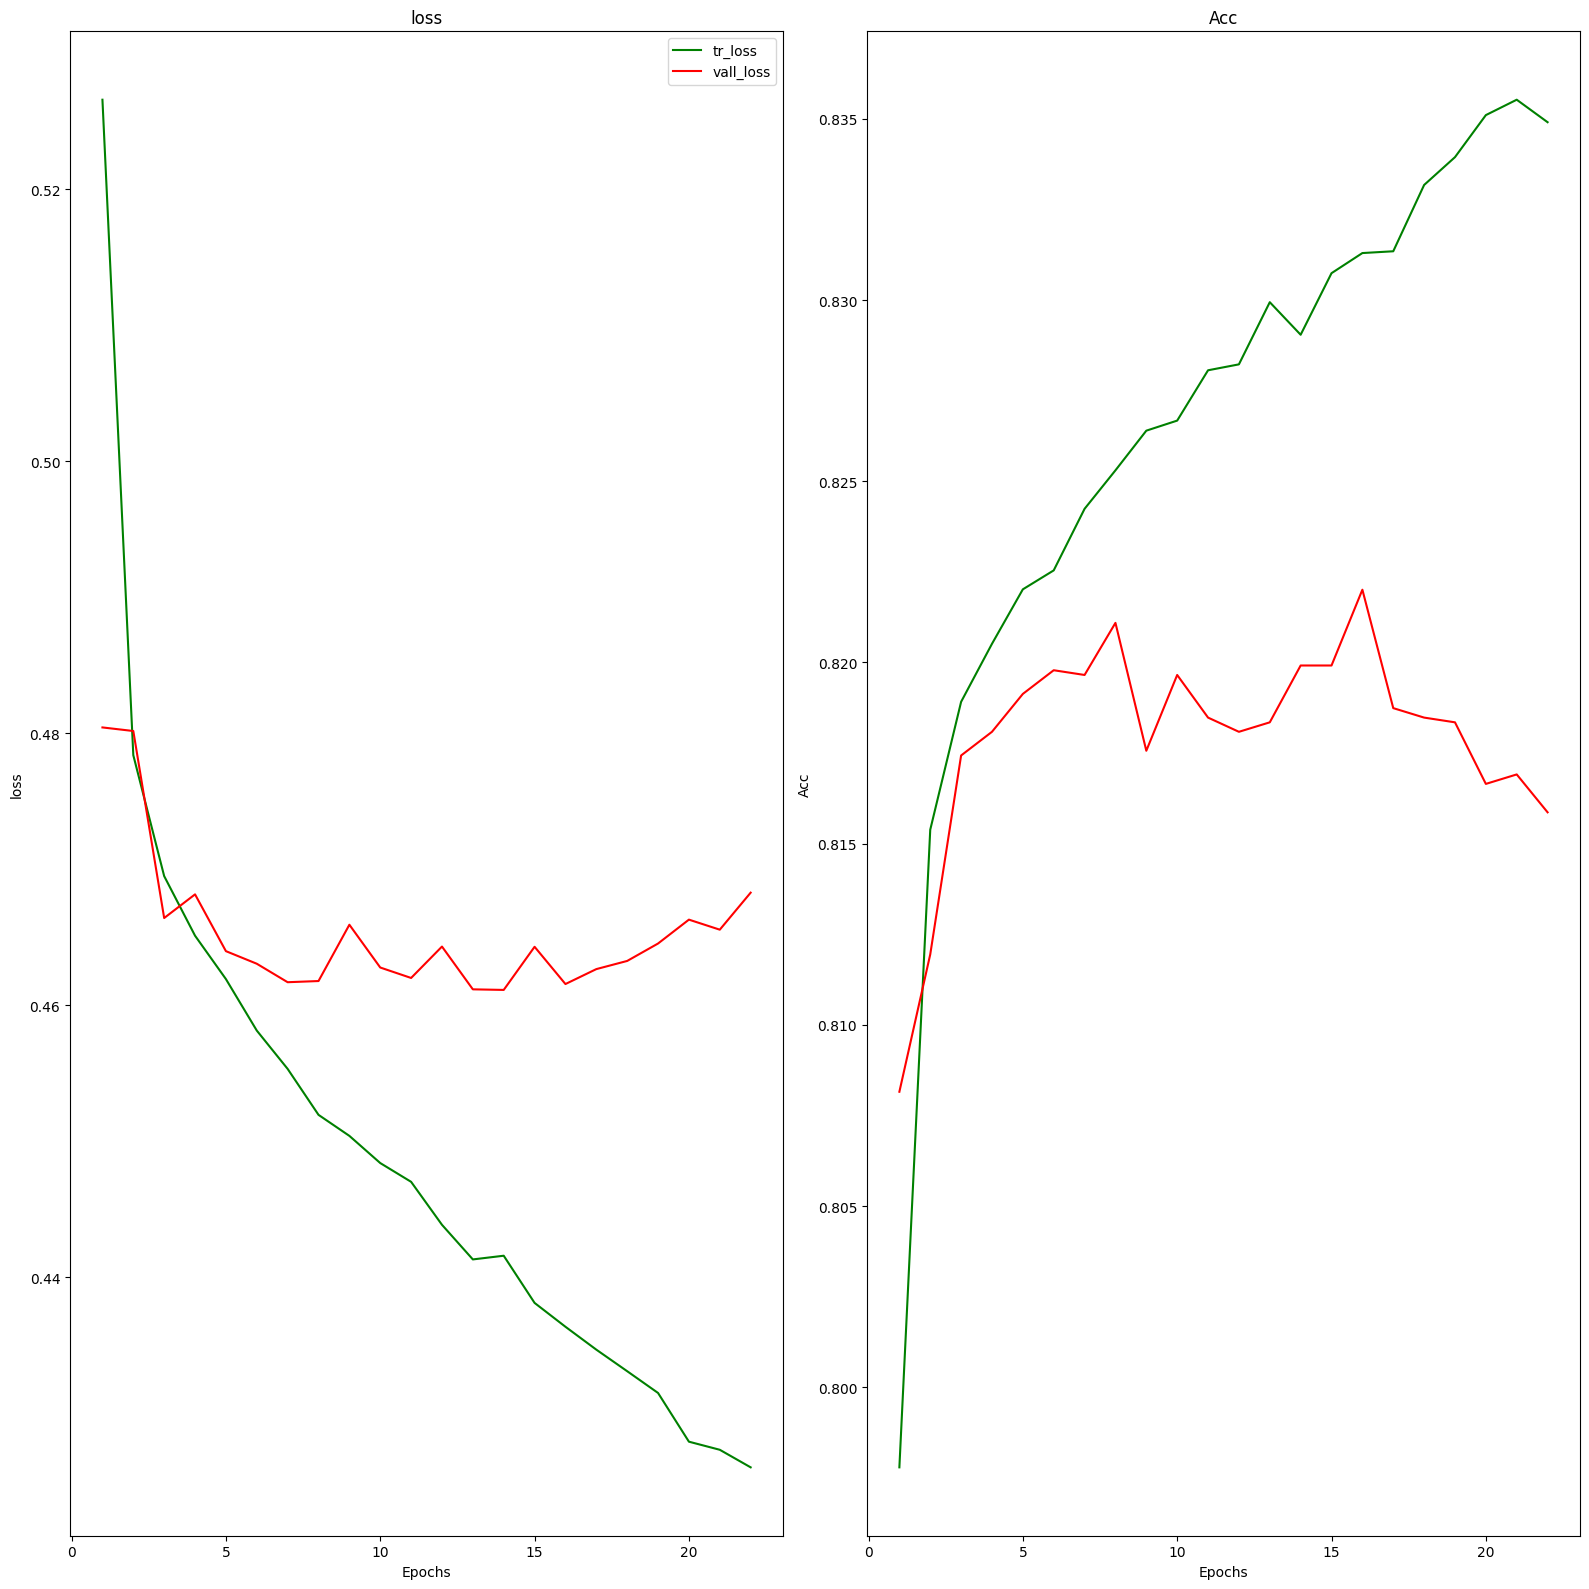

In [40]:
tr_loss=hist3.history['loss']
vall_loss=hist3.history['val_loss']
tr_acc=hist3.history['accuracy']
val_acc=hist3.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show


In [41]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
BatchNormalization(),
dr=Dropout(0.3)(d1)
d2=Dense(512,activation='relu')(dr)
dr1=Dropout(0.3)(d2)
d6=Dense(512,activation='relu')(dr1)
dr2=Dropout(0.1)(d6)
d3=Dense(256,activation='relu')(dr2)
d4=Dense(128,activation='relu')(d3)
dr3=Dropout(0.1)(d4)
d5=Dense(64,activation='relu')(dr3)
out=Dense(3,activation="softmax")(d5)
model4=Model([inp],[out])
model4.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 716,931 (2.73 MB)

 Trainable params: 716,931 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
modelcheckpoints=ModelCheckpoint('model.weights.keras',monitor='val_loss',save_best_only=True,save_weights_only=False)
earlyStopping=EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)
logger=CSVLogger('model.csv')
reduce=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=7)

In [43]:
model4.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [44]:
hist4=model4.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=35,batch_size=64,callbacks=[modelcheckpoints,reduce,logger])


Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_40']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


957/957 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7884 - loss: 0.5480 - precision_4: 0.8280

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_40']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7884 - loss: 0.5479 - precision_4: 0.8280 - val_accuracy: 0.8106 - val_loss: 0.4846 - val_precision_4: 0.8315 - learning_rate: 0.0010
Epoch 2/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8130 - loss: 0.4836 - precision_4: 0.8361 - val_accuracy: 0.8129 - val_loss: 0.4711 - val_precision_4: 0.8325 - learning_rate: 0.0010
Epoch 3/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8207 - loss: 0.4714 - precision_4: 0.8386 - val_accuracy: 0.8190 - val_loss: 0.4764 - val_precision_4: 0.8347 - learning_rate: 0.0010
Epoch 4/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8234 - loss: 0.4669 - precision_4: 0.8399 - val_accuracy: 0.8156 - val_loss: 0.4764 - val_precision_4: 0.8357 - learning_rate: 0.0010
Epoch 5/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8226 - loss: 0.4684 - precision_4: 0.8407 - val_accuracy: 0.8186 - val_loss: 0.4712 - val_precision_4: 0.8316 - learning_rate: 0.0010
Epoch 6/3

<function matplotlib.pyplot.show(close=None, block=None)>

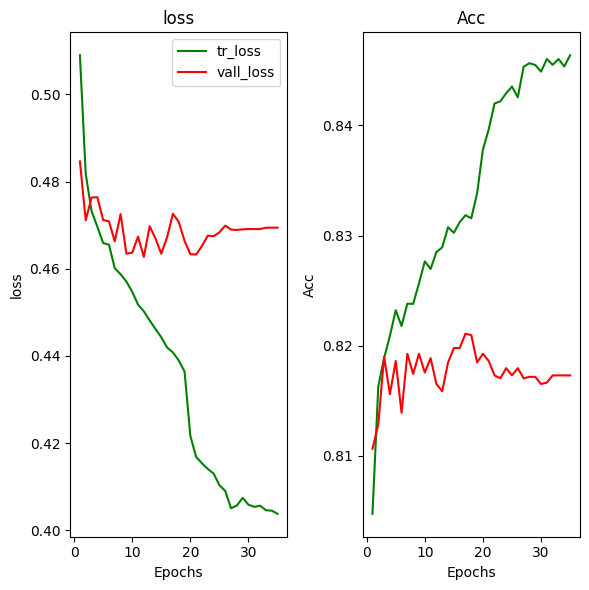

In [45]:
tr_loss=hist4.history['loss']
vall_loss=hist4.history['val_loss']
tr_acc=hist4.history['accuracy']
val_acc=hist4.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show

In [46]:
xx=df.drop(columns=['Target'])
yy=df['Target']

In [47]:
encoder=LabelEncoder()
yy=encoder.fit_transform(yy)
scaler=StandardScaler()
xx=scaler.fit_transform(xx)

In [48]:
xxtrain,xxtest,yytrain,yytest=train_test_split(xx,yy,test_size=0.2,random_state=42,stratify=y)

In [49]:
rf=RandomForestClassifier(n_estimators=100,max_depth=9)
rf.fit(xxtrain,yytrain)

RandomForestClassifier(max_depth=9)

In [50]:
print(rf.score(xxtrain,yytrain))
print(rf.score(xxtest,yytest))

0.8317868461463064
0.818086774699425


In [51]:
xgb=XGBClassifier(n_estimators=25)
xgb.fit(xxtrain,yytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
print(xgb.score(xxtrain,yytrain))
print(xgb.score(xxtest,yytest))

0.8459176005488941
0.8263199163617355


In [53]:
lgbm=LGBMClassifier(n_estimators=150)
lgbm.fit(xxtrain,yytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 36
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218


LGBMClassifier(n_estimators=150)

In [54]:
print(lgbm.score(xxtrain,yytrain))
print(lgbm.score(xxtest,yytest))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8610775312836932


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8283455305802404


In [55]:
testdf=pd.read_csv('test.csv.zip')
testdf.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [56]:
testdfsc=scaler.transform(testdf.iloc[:,1:])

In [57]:
pesd1=lgbm.predict(testdfsc)
pesd1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([0, 2, 2, ..., 0, 0, 0])

In [58]:
pesd1=encoder.inverse_transform(pesd1)
pesd1

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [61]:
supp=pd.read_csv('sample_submission.csv')

In [62]:
supp.head()


,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [63]:
supp['Target']=pesd1
supp.head()


,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [64]:
supp.to_csv('submission.csv',index=False)

In [65]:
pesd=model4.predict(testdfsc)
pesd


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_40']
Received: inputs=Tensor(shape=(32, 36))
  warnings.warn(msg)


1562/1595 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_40']
Received: inputs=Tensor(shape=(None, 36))
  warnings.warn(msg)


1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


array([[9.97825563e-01, 1.76280353e-03, 4.11594578e-04],
       [6.19333982e-03, 1.53972255e-02, 9.78409469e-01],
       [6.06746338e-02, 2.47033671e-01, 6.92291737e-01],
       ...,
       [9.78774250e-01, 1.05396612e-02, 1.06861182e-02],
       [9.00271535e-01, 9.71046016e-02, 2.62393011e-03],
       [9.71018672e-01, 1.17421122e-02, 1.72392149e-02]], dtype=float32)

In [66]:
pesd=encoderr.inverse_transform(pesd)
pesd

array([['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Dropout'],
       ['Dropout'],
       ['Dropout']], dtype=object)

In [67]:
supp=pd.read_csv('sample_submission.csv')

In [68]:
supp['Target'] = pesd.ravel()
supp.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [69]:
supp.to_csv('submission1.csv',index=False)